# ch7 Mnist Dataset

<p> tensorflow 계열에서는 가장 유명하다.<br/>
(가장 신뢰할 수 있는 데이터로 어디서나 mnist 데이터셋을 사용하고 있었다.)</p>

mnist는 우편번호의 자동분류 데이터셋이다. 
1. 글자 하나의 크기는 28x28이고, 
2. 모두 흑백으로 되어 있다. 
3. 데이터셋은 image와 label로 구분되어 있고,<br/> 
   각각은 다시 train과 test로 나누어져 있다. 
4. validation set은 보이지 않는데, tensorflow 예제를 분석하다 보면 만날 수 있다.<br/>
(이미지 분류 샘플이면서, 흑백이어서 GPU가 없이도 돌려볼 수 있다.)

출처: http://pythonkim.tistory.com/26 [파이쿵]<br/>
<img src="./img/lab_07_06.png" align = "left">

## 1. Coding
- (슬라이드) https://docs.google.com/presentation/d/1cVwqMpERToATs1JGYps0F3MLARP8OAlw6ZIe-lpPHYs/edit#slide=id.g1d27a36b08_0_4
- (필기정리) http://pythonkim.tistory.com/26

### 01) Processing by Batch

In [12]:
# 0 - 9 digits recognition = 10 classes
nb_classes = 10
import tensorflow as tf

In [13]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [14]:
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [15]:
# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [16]:
# Initialize TensorFlow variables
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [1]:
# Inputing Tensor -----------------------------------------------
# MNIST 자료를 다운로드 한다 (기본 서버에서 다운로드)
# https://www.tensorflow.org/get_started/mnist/beginners (for more information about the mnist dataset)
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)  # one_hot = True : Y 값을 One-Hot형식으로 불러오기

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


<p>Definition</p></br>
<p><strong><i>one epoch</strong></i> = one forward pass and one backward pass of all the training examples <br/>
<strong><i>batch size</strong></i> = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.<br/>
<strong><i>number of iterations</strong></i> = number of passes, each pass using [batch size] number of examples.<br/>
<strong><i>To be clear, one pass</strong></i> = one forward pass + one backward pass <br/>
(we do not count the forward pass and backward pass as two different passes).

In [18]:
# parameters : 자료가 많아서, Batch 로 index를 호출
training_epochs = 15
batch_size = 100  

In [19]:
# Training cycle
for epoch in range(training_epochs):  # 15번 반복
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)      # ( 전체자료 / Batch ) : 100개씩 나눠서 인식

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)   # Batch 만큼 분할인식
        c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch
    
    if epoch % 3 == 0 :
        print('Epoch:', '%04d' % (epoch + 1),'cost =', '{:.9f}'.format(avg_cost))
print("Learning finished")

Epoch: 0001 cost = 2.694855791
Epoch: 0004 cost = 0.744140565
Epoch: 0007 cost = 0.598525911
Epoch: 0010 cost = 0.528747783
Epoch: 0013 cost = 0.485760467
Learning finished


In [20]:
accuracy = accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels})
print("Accuracy:",'{:.2%}'.format(accuracy))

Accuracy: 89.29%


### 02) Checking by Matplotlib

In [ ]:
%matplotlib inline
# Jupyter 내부에서 Plot를 출력한다.
import matplotlib.pyplot as plt

In [21]:
import random
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Label:  [8]
Prediction:  [8]


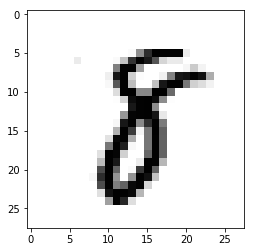

In [24]:
plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28),
                                       cmap='Greys',
                                       interpolation='nearest')
plt.show()

In [23]:
sess.close()